## Face Detection
- 이미지 속의 얼굴을 빠르고 정확하게 인식하는 방법
    1. Dlib 라이브러리를 이용해서 Face Landmark를 찾아내는 것
    2. Dlib 얼굴 인식에서 개선해 볼 포인트와 YOLO, SSD 등 Face Detection을 위한 딥러닝 모델들 사용

## 학습 내용
2. Dlib 얼굴 인식의 문제점
    - dlib 라이브러리를 이용하여 얼굴의 랜드마크를 찾아낼 때의 문제점을 짚어보자.

3. Single Stage Object Detection
    - 2-stage detector에 비해 상대적으로 속도가 빠른 1-stage 기반의 모델들을 공부해보자.

4. YOLO(1) YOLO v1의 등장
    - Object Detection의 획기적인 발전을 이끌게 된 YOLO 모델의 개요를 살펴보자.

5. YOLO(2) YOLO v1의 원리
    - YOLO v1의 특징과 원리에 대해 공부해보자.

6. YOLO(3) YOLO v1의 성능
    - YOLO v1의 loss function에 대해 이해하고, 모델 성능에 대해 이해해보자.

7. YOLO(4) YOLO v2
    - YOLO v1에서 정확도를 더 끌어올린 YOLO v2에 대해 알아보고, 무엇이 달라졌는지 확인해보자.

8. YOLO(5) YOLO v3
    - YOLO v3의 원리와 전체적인 모델의 아키텍쳐에 대해 공부해보자.

9. YOLO v3 그 이후
    - YOLO v3 이후에는 어떻게 버전 업이 되었을까?

10. SSD(1) SSD의 특징
    - YOLO v1의 단점을 보완하기 위해 SSD에서 제안한 테크닉들을 살펴보자.

11. SSD(2) SSD의 Loss와 성능
    - SSD의 loss function에 대해 이해하고, 모델 성능에 대해 이해해보자.

12. Face Detection을 위한 모델들
    - YOLO와 SSD 외에도 SOTA Face Detection 모델들에 대해 알아보자.

## 19-2. Dlib 얼굴 인식의 문제점
Q. Dlib 라이브러리를 이용해 Face Landmark를 찾아낼 때의 문제점은 무엇인가?
```
- 얼굴을 잘 못 찾는다.
- 동영상을 처리하기엔 너무 느리다.
- 얼굴각도, 방향, 크기 등의 변화에 취약하다.
- 얼굴을 감지하는데 HOG(Histogram of Oriented Gradients) 기반의 얼굴 감지기를 사용한다.
- 하지만 이는 다양한 조건에서 정확하게 감지하는데 어려움이 있다.
```

- edge device(=휴대폰)에서 바로 이용하면 네트워크 비용 + 서버 비용 + 인터넷 속도에 상관없이 항상 동작할 수 있다.
- 핸드폰에 모델을 올리려면 weight가 작은 모델이 관리에 유리하다.

### 어떻게 빠르게 만들 수 있을까?
- Face detection에서 많은 시간이 드는 요소는 Sliding window이다.

```
슬라이딩 윈도우(Sliding window)
- 입력 데이터를 고정 크기의 윈도우로 나누어 전체 입력을 순회하면서 작업을 수행하는 기술
- 이미지에서 특징이나 패턴을 찾거나 객체를 감지할 때, 고정 크기의 윈도우를 이미지 위에 이동시키면서 작업을 수행

바운딩 박스(Bounding box)
- 주로 객체의 위치를 나타내기 위해 사용되는 사각형 영역

- 슬라이딩 윈도우를 사용하여 이미지를 스캔하면서 작은 객체나 특징을 찾고,
- 발견된 위치에 대해 바운딩 박스를 지정하여 해당 객체의 경계를 표시
```

- 그러므로 Sliding window를 버려야 빨라진다.
- 따라서 2-stage 방식의 detection은 좋은 선택이 아니다.

```
1-stage(Single-stage) 방식
- 이미지의 각 위치에서 객체를 직접 예측하는 방식
- 이미지를 격자로 나누고, 각 격자 셀에서 바로 객체의 존재 여부와 클래스를 예측하는 방식
- 예측과 정답을 한 번에 처리하므로 빠르게 실행
- 대표적인 모델은 YOLO

2-stage(Two-stage) 방식
- 1. 이미지에서 후보 영역을 찾는다. RPN(Region Proposal Network)
- 2. 각 후보 영역에 대해 객체의 정확한 bounding box 및 클래스를 예측
- 두 단계를 통해 정확한 개체 검출이 가능하고, 높은 정확도
- 대표적인 모델은 Faster R-CNN, R-FCN

1-stage 방식은 이미지 전체에 대해 윈도우를 이동하면서 객체의 존재 여부를 예측,
- 큰 이미지에서는 많은 윈도우가 필요하여 계산이 비용이 높다.

2-stage 방식은 후보 영역을 먼저 선정하고 그 후 예측을 수행,
- 비용이 많이 든다, 정확도 높다.
```

## 19-3. Single Stage Object Detection
- 2-Stage Detector는 물체가 존재하는 bounding box를 먼저 찾은 후에 bounding box를 분류하는 두 가지 과정을 순차적으로 거쳤기 때문에 정확도는 높지만 실행속도(FPS)는 느리다.
- 얼굴 인식과 같이 딥러닝 모델이 가벼워야 하는 TASK는 1-Stage 기반을 사용하는 것이 유리하다.
<br/><br/>

Q. 1-Stage Detecotr와 2-Stage-Detector의 차이점은 무엇인가요?
```
1-Stage Detector는 물체의 위치와 클래스를 한번에 예측하는 모델
2-Stage Detector는 물체의 위치와 클래스를 예측하는 과정을 두 단계로 나눈 모델

즉,
- 1-Stage Detector는 단일 네트워크를 이용하여 물체 검출을 수행
- 2-Stage Detector는 여러 개의 네트워크를 이용하여 검출을 수

1-Stage Detector가 2-Stage Detector보다 상대적으로 속도는 빠르지만, 정확도가 낮다.
```

## 19-4. YOLO (1) YOLO v1의 등장
- YOLO : You Only Look Once


## 19-5. YOLO (2) YOLO v1의 원리

### YOLO의 특징
1. You Only Look Once
    - 전체 이미지를 보는 횟수가 1회라는 것을 의미
    - YOLO는 클래스에 대한 정보와 주변 정보까지 한번에 학습하고 처리한다.
    - 따라서 배경 오류가 적고 일반화 성능이 좋다.

2. Unified
    - Localization과 Classification을 동시에 수행(1-stage)
    - YOLO는 이미지를 신경망에 넣어주기만 하면 바로 detection이 가능

3. Real-Time
    - 기본적인 YOLO 모델로는 45FPS(초당 프레임수), 빠른버전은 150FPS까지 성능을 보인다.
    - 따라서 스트리밍 비디오에서도 실시간으로 객체를 detection할 수 있다.
---
### RCNN과 YOLO
![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-03_11-03-35.max-800x600.png)
- 대표적인 2-stage detector인 RCNN과
- 1-stage detector인 YOLO 모델의 기본 가정 차이
    - RCNN 계열의 가정:
        - "객체가 존재할 것 같은 곳을 backbone network로 표현할 수 있다." -> Region Proposal Network(RPN)<BR/>

    ```
    RPN
    이미지를 입력으로 받아 다양한 위치에서 객체가 존재할 것으로 예상되는 영역
    이미지를 여러 크기의 윈도우로 나누고, 각 윈도우에서 객체의 존재 여부를 판별하기 위한 특성 맵을 추출
    ```

    - YOLO v1의 가정:
        - "이미지 내의 작은 영역을 나누면 그곳에 객체가 있을 수 있다." -> grid 내에 객체가 존재
- 따라서 YOLO v1에서 grid는 고정되고, 각 grid 안에 객체가 있을 확률이 중요하다.
---
### YOLO의 grid cell
![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-03_11-04-31.png)
1. YOLO는 이미지를 SxS grid로 나누고,
2. box regression 단계와
3. 각 클래스마다 probability map을 구하는 단계가 동시에 병렬적으로 수행

```
box regression
- 객체의 위치를 정확히 특정하는 과정
- 초기 예측된 바운딩 박스의 상대적인 좌표와 크기를 실제 이미지의 좌표와 크기로 조정하는 과정
- 이를 통해 모델은 정확한 객체의 위치를 예측

probability map
- 객체 검출에서 각 위치 또는 격자 셀에서 특정 클래스에 속할 확률을 나타내는 지도
- 각 격자 셀에서 특정 클래스에 속할 확률을 나타내는 지도로, 객체의 클래스를 정확히 분류하기 위해 사용
```

- 논문에서는 입력 이미지를 7x7 gird로 나누고,
- 각 grid cell마다 예측하는 bound box(bbox)를 2개,
- 총 클래스의 수는 20으로 정했다.
<br/><br/>
- 각 grid cell은 bounding box와 C개의 class 확률을 예측한다.
<br/><br/>
- 각 bounding box는 x, y, w, h, confidence score를 예측
- x, y는 bbox의 중심 좌표
- w, h는 너비와 높이
- 주의할 점
    - w, h는 입력 이미지를 bbox의 너비와 높이를 나눠서 normalize한 값
    - 0과 1사이의 값을 가진다.
<br/><br/>
- confidence score는 box가 객체를 포함하고 있는지를 모델이 얼마나 자신 있는지,
- 그리고 박스가 예측하는 것이 얼마나 정확한지를 보여준다.
- 이를 식으로 나타내면 다음과 같다.

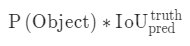
- 만약 gird cell이 객체를 포함하지 않으면
    - P(Object)이 0이므로 confidence score는 0
- grid cell이 객체를 정확히 포함하고 있다면
    - P(Object)는 1이므로 결국 IoU만 남는다.
- 따라서 confidence score가 예측된 box와 ground truth box 사이의 IoU와 같도록 하는 것이 좋다.
<br/><br/>
- C개의 조건부 클래스 확률 P(Class_i|Object)은 grid cell이 사물을 포함할 때 bbox안의 객체가 i번째 클래스에 속할 확률이다.
- bbox의 개수와 상관 없이 각 grid cell의 확률만 예측한다.
- 위 내용을 정리하면 하나의 grid cell에 대해 아래와 같은 tensor가 나온다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-05_11-44-14.max-800x600.png)


- 맨 위의 이미지에서 보면 자전거를 포함하는 grid가 많다.
- 그럼 gird의 bbox가 모두 자전거라고 예측할까?
- 학습이 잘된 경우는 해당 grid들이 모두 비슷한 크기로 자전거의 bbox를 잡는다. 여기서 동일한 객체를 잡는 bbox가 많아진다는 문제가 생긴다.
<br/><br/>
- 이때 NMS(Non-Maximum Suppression)
    - 비-최대 억제라고도 불리는 기법
    - object detector가 예측한 여러 개의 bounding box 중 정확한 bounding box만을 선택하는 기법
<br/><br/>
- NMS의 알고리즘은 다음과 같다.
    1. 하나의 클래스에 대한 높은 confidence score 순서대로 bbox를 정렬한다. confidence score가 특정 threshold를 넘지 않는 것은 제거한다.
    2. 가장 높은 confidence Score의 bbox와 겹치는 다른 bbox를 비교하여 IoU가 threshold보다 높으면 겹치는 bbox를 목록에서 제거한다.
        - 두 bbox의 IoU가 높다는 것은 같은 객체를 detect하고 있다는 의미이기 때문이다.
    3. 1과 2의 과정을 반복해 마지막으로 남은 bbox를 반환
    4. 각 클래스에 대해 위의 과정을 반복한다.
- NMS 알고리즘을 적용하면 아래 그림과 같이 겹쳐 있는 bbox 중 정확한 bbox만 표시한다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-03_12-05-25.png)
- YOLO의 목표는 grid에 포함되는 객체를 잘 잡아내는 것이다.
- 즉 grid cell에 속하는 객체를 검출할 책임이 있다.
- 따라서 1개 grid에 귀속된 bbox 정보(x, y, w, h)의 학습 목표는 bbox의 ground truth와 최대한 동일하도록 학습되는 것이다.
- 학습 목표가 제대로 이루어졌는지를 확인하려면 객체 인식 모델의 성능 평가 도구인 IoU(Intersection over Union)을 사용

```
IoU(Intersection over Union)
- object detection에서 사용되는 도구
- 성능 지표가 아니라 모델의 성능 평가를 하는 과정에서 사용
- 두 box의 크기가 동일하다 가정하면, 두 개의 box가 적어도 2/3는 겹쳐줘야 0.5의 값이 나오기 때문에,
- 여러 곳에서 IoU의 threshold 값을 0.5로 잡아서 사용한다.

```
![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F994889425D14A35816)
---
### YOLO의 네트워크 구조
- 24개의 Conv 레이어
- 2개의 Fully connected 레이어

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-03_12-32-17_ESbpTAx.max-800x600.png)
- 모델 구조의 앞부분(Pretrained)은 InmageNet의 1000개 클래스 데이터셋을 가지고 사전학습한 GoogLeNet 모델이다.
- 사전학습을 위해 20개의 Conv 레이어와 average pooling 레이어와, fully connected 레이어를 사용했다.
- 그러나 GoogLeNet의 Inception 모듈 대신 1x1 reduction 레이어를 사용하여 연산량을 감소시켰다.

## 19-6. YOLO (3) YOLO v1의 성능
### YOLO v1의 loss 함수
- YOLO의 loss는 bbox의 위치 예측과 관련된 localization loss와
- 클래스 예측과 관련된 classification loss가 있다.
- 두 loss 모두 SSD(sum-squared error)를 기반한다.
- SSE는 두 loss를 동일하게 가중치를 준다.
- 이는 모델의 불균형을 초래한다.
<br/><br/>
- 이런 문제를 해결하기 위해 bbox의 좌표에 대한 loss를 증가시키고,
- 객체가 없는 box의 confidence 예측값의 loss는 감소시킨다.
- 이를 위해 아래의 두 개의 하이퍼파라미터를 사용한다.

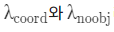
<br/><br/>
- 뿐만 아니라 SSE는 큰 bbox와 작은 bbox의 loss를 모두 동일한 가중치로 계산한다.
- 그러나 작은 bbox가 큰 bbox보다 조그마한 위치 변화에도 더 민감하다.
- 이를 개선하기 위해 bbox의 너비와 높이에 square root를 취해준다.
- YOLO의 loss함수는 아래와 같다.

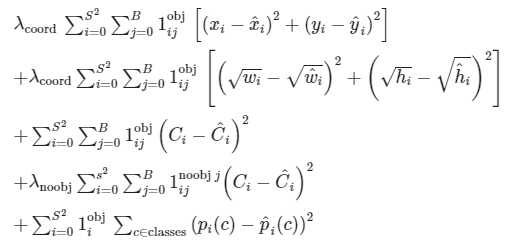
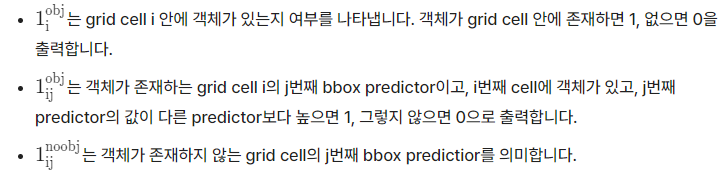
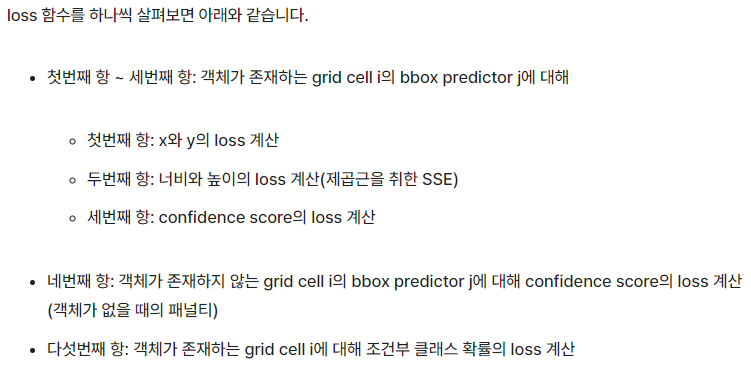

Q. YOLO v1의 loss function은 어떻게 구성되어 있나요?
```
1. 이미지의 각 grid 셀에 물체가 존재하지 않는 지에 대해 0과 1로 나타내주는 objectness score 부분
2. bbox의 위치 예측과 관련한 localization loss
3. 클래스 예측과 관련된 classification loss
```

### YOLO의 성능
![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-03_16-57-08.png)
![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-03_17-00-17.max-800x600.png)
- YOLO v1은 Faster R-CNN과 성능에 큰 차이가 나지 않으면서 속도는 6배 이상인 혁신적인 모델이다.


### YOLO v1의 단점
- 각각 grid cell이 2개의 box와
- 하나의 클래스만 예측하므로 가까이 있는 여러 개의 객체를 예측하기 어렵다.
- 특히 새떼와 같이 그룹으로 나타나는 작은 object에 대해 예측을 제대로 하지 못한다.
- 또한 bbox의 형태가 training data를 통해 학습되었기 때문에
- bbox 분산이 너무 넓어 새로운 형태의 bbox 예측이 잘 안됀다.
- 모델 구조상 backbone만 거친 feature map을 대상으로 bbox 정보를 예측하기 때문에 localization이 다소 부정확하다.
- 마지막으로 loss 함수가 작은 bbox와 큰 bbox의 loss를 같게 다루기 때문에
    - 큰 box의 작은 loss보다
    - 작은 box의 작은 loss가
    - IoU에 더 큰 영향을 미친다.

## 19-7. YOLO (4) YOLO v2
- YOLO의 정확도가 낮아 YOLO를 v2로 발전시켰다.

### YOLO v2의 목적
- Make it better
- Do it faster
- Makes us stronger
- 간단히 요약하면 recall을 올리고 localization을 잘해보자!이다.
<br/><br/>
### Make it better
---
- Better는 정확도를 올리기 위한 방법이다.
- YOLO v2에서는 이전 모델에서 낮은 성능으로 보였던 localization과 recall을 높이면서도 여전히 모델을 단순하게 만들고 속도를 빠르게 하려고 했다.
<br/><br/>
- 이를 위해
    - Batch Normalization
    - High Resolution Classifier
    - Convolutional with Anchor boxes
    - Dimension Clusters
    - Direct location prediction
    - Fine-Grained Features
    - Multi-Scale Training

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-03_17-17-00.max-800x600.png)
- 정확도를 높이기 위해 사용했던 각각의 방법을 간단히 정리하면 아래와 같다.
---
#### Batch Normalization
- 모든 conv 레이어에 batch normalization을 사용하였고, dropout은 제거했다.
- 이로써 mAP에서 2% 이상의 성능 개선
---
#### High Resolution Classifier
- YOLO v1에서 ImageNet의 224x224 이미지를 학습하고,
- detection에서 448x448 이미지를 사용했던 것과 달리
- YOLO v2에서는 처음부터 448x448의 해상도로 학습했다.
- 이로써 mAP에서 4% 정도의 성능 개선
---
#### Convolutional With Anchor Boxes
- bbox를 예측하기 위해 YOLO v1의 Fully connected 레이어를 제거한 후 Fully Convolutional Network를 사용하였고,
- anchor box들을 사용해 bounding box를 예측했다.
- 또한 1개의 중앙점을 갖는 13x13(홀수x홀수)의 출력 feature map을 만들도록 입력 이미지의 크기를 448x448에서 416x416로 줄였다.
- 이는 대부분의 객체가 이미지의 중앙에 있는데, 중앙에 위치한 객체의 경우는 중앙점이 하나일 경우에 더 잘 예측할 것이라는 예상 때문이다.
- 따라서 YOLO v2는 13x13x5개의 bbox를 예측한다.
- 그 결과 mAP는 69.5에서 69.2로 떨어지지만
- recall은 81%에서 88%로 증가하였다.
---
#### Dimension Cluster
- Fast R-CNN에서는 anchor box의 크기와 비율을 사전에 정해주고, 학습을 통해 세부 조정 했다.
- 그러나 YOLO v2는 k-means clustering을 적용해 최적의 anchor box를 결정했다.
<br/><br/>
- 하지만 유클리드 거리를 사용하는 일반적인 k-means clustering과 달리
- IoU 개념을 distance metric으로 사용해 더 좋은 anchor box를 얻을 수 있다.
- 그 이유는 ground truth box와 유사한, 즉 IoU가 높은 anchor box를 찾기 위해서이다.
- 클러스터링 개수를 늘리면 정확도가 높아지지만 속도가 느려지므로 YOLO v2는 최종적으로 5개의 anchor box를 사용했다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-03_18-00-10.png)
---
#### Direct location prediction
- YOLO v2는 결정한 anchor box에 따라서 하나의 셀에서 5차원의 벡터로 이루어진 bbox를 아래와 같은 방식으로 조정하여 예측했다.
- 학습 초반에 random initialization으로 인한 학습의 불안정을 예방하기 위해 bbox가 grid cell을 벗어나지 않도록 제약을 둔다.
- 주의할 점은 YOLO v1이 grid cell의 중앙점을 예측했다면,
- YOLO v2는 좌상단으로부터 얼마나 이동하였는지 예측한다.
- Dimension Cluster와 Direct location prediction을 사용해 약 5%의 성능 향상을 얻었다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-03_18-11-11.png)
---
#### Fine-Grained Features
- 13x13의 feature map은 작은 물체 검출을 잘 못한다는 단점이 있었기 때문에
- YOLO v2는 passingthrough 레이어를 사용했다.
- passingthrough 레이어는 이전 레이어의 26x26 feature map과 13x13의 feature map을 concatenate한다.
- 이렇게 하는 이유는 26x26의 feature map에 Fine-Grained Features(고해상도 피처)가 담겨 있기 때문이다.
<br/><br/>
- 그러나 두 feature map의 크기가 다르기 때문에 26x26x512 feature map을 13x13x2048 feature map으로 변환한 후 concatenate 했다.
- 이로써 약 1%의 성능 향상을 보였다.
---
#### Multi-Scale Training
- 모델이 다양한 입력 사이즈에도 예측을 잘 할 수 있도록 매 10개의 batch마다 입력 이미지의 크기를 바꿔가면서 모델 학습알 하였다.
- 모델이 32 간격으로 downsample 되므로 입력 이미지는 32의 배수가 될 수 있다.
- 그래서 입력 이미지의 크기는 {320, 352, ... 608} 중 하나가 사용된다.
---


### Do it faster
---
- faster는 detection 속도를 향상시키기 위한 방법
#### Darknet-19
- YOLO v2에서는 Fully Connected 레이어를 제거하고 global average pooling을 하여 가중치 파라미터 수를 크게 줄였다.
- 이렇게 해서 만든 최종 모델은 Darknet-19라고 불린다.
- 19개의 conv 레이어와 5개의 maxpooling 레이어로 이루어진다.
<br/><br/>
- DarkNet-19를 통과한 YOLO v2의 최종 출력은 13x13x125이다.
- 위에서 feature map이 13x13이라고 했고,
- 5개의 bbox를 예측하기 때문에
- 5 * (5 + 20)이므로 13x13x125이다.
- 이전 스텝에서 하나의 bbox가 x, y, w, h, confidence를 예측하고, 클래스의 개수가 20개라고 했던 부분을 기억하자.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-05_14-45-08.png)
---
### Makes us stronger
---
- stronger는 더 많은 범위의 class를 예측하기 위한 방법
<br/><br/>
- YOLO v1는 PASCAL VOC 데이터셋에서 제공되는 20개의 클래스를 기준으로 학습행서 20개의 클래스만 detection했다.
- 그러나 YOLO v2에서는 9천개의 클래스에서 detection할 수 있도록 하고,
- 그 모델을 YOLO9000이라고 부른다.
<br/><br/>
- YOLO9000은 YOLO v2와 모델 구조가 같고 detection하는 라벨을 늘렸다.
- 9000개의 클래스에 대해 분류를 하기 위해 계층적으로 분류 작업(Hierachical Classification)을 수행하여 기존의 WordNet 기반의 데이터를 트리 구조인 WordTree를 생성했다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_12-22-08.png)
---
### YOLO v2의 성능 비교
![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-05_15-09-50.max-800x600.png)


## 19-8. YOLO (5) YOLO v3
### YOLO v3 원리
- YOLO v3는 YOLO v2보다는 속도가 조금 느리지만 정확도를 개선한 모델이다.
- 특히 YOLO의 약점이었던 작은 물체를 detection할 때 성능을 개선했다.
<br/><br/>
- 차이점
#### Bounding box Prediction
- 이는 YOLO v2와는 거의 차이가 없다.
- 그러나 각각의 bbox 마다 objectness score, 즉 bbox에 물체가 있는지를 예측하는 점수를 logistic regression을 사용해 예측했다.
- anchor box와 ground truth box의 IoU가 가장 높은 박스의 objectness score는 1로 두고 나머지는 무시했다.
- 또한 Faster R-CNN 등의 다른 모델과 달리 각각의 ground truth에 대해 1개의 bbox만 가지게 된다는 차이가 있다.
---
#### Class prediction
- 하나의 이미지에 다양한 label을 붙일 수 있는 multilabel classification를 하였다.
- 예를 들어 여성의 이미지에 person과 woman이라는 두 가지의 label을 붙일 수 있다는 것을 의미한다.
- 이를 위해 여러 개 중 하나만 찾는 softmax classifier가 아닌 해당 label이 맞는지 아닌지를 판단하는 logistic classifier를 사용하였고,
- binary cross entropy를 사용해 loss를 계산했다.
---
#### Predictions Across Scales
- YOLO v3는 3개의 scale로 bbox를 예측했고,
- 각 scale당 3개의 bbox를 예측했다.
- 따라서 총 9개의 bbox가 나오게 되며, 텐서는 N x N x [3 * (4 + 1 + 80)]이다.
- 여기서 3은 anchor box의 수
- 4는 bbox의 좌표, 너비, 높이
- 1은 objectness score
- 80은 클래스의 수이다.
<br/><br/>
- 또한 feature map을 2배씩 upsampling함 (13, 26, 52)으로써 더 의미 있는 semantic information을 얻고,
- 이전 feature map과 concatenate하여 보다 fine-grained한 정보를 얻을 수 있다.
---
#### DarkNet-53
- 성능을 높이기 위해 YOLO v3은 53개의 레이어를 사용했다.
- YOLO v2의 아키텍처였던 DarkNet-19에 residual network를 넣어 레이어를 53개까지 쌓을 수 있다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_14-32-44.png)

---

- 전체 모델 구조는 아래의 이미지와 같다.
- 입력 이미지를 DarkNet-53에 통과시켜서 downsampling하면서 feature map을 추출
- 이 feature map을 토대로 datection을 하고,
- upsampling 후
- 다시 detection하고
- 다시 upsampling을 한 후 detection 한다.
- 즉 3개의 scale된 bbox를 이용한 detection을 함으로써 여러 개의 label에 대해서도 classification을 할 수 있다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-08_14-41-33.max-800x600.png)

## 19-9. YOLO v3 그 이후
### YOLO v4
- YOLO v3보다 AP와 FPS가 각각 10%, 12% 증가하였다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_15-15-12.png)
- YOLO v4는 YOLO v3에 다양한 기법을 사용해 하나의 GPU로 object detection을 실시간으로 할 수 있도록 만든 모델이다.
<br/><br/>
```
YOLO v4 = YOLO v3 + CSPDarkent53 + SPP + PAN(Path Aggregation Network) + BoF(Bag of Fressbies) + Bos(Bag of Specials)
```
<br/><br/>
- Bag of Freebies
    - Inference cost의 변화 없이 성능을 향상시키는 방법
    - 전처리 또는 학습 단계에서 사용된다.
    - Data Augmentation, Regularization, Loss Function 등이 이 기법에 속함

- Bag of Specials
    - Inference cost가 조금 상승하면서 성능을 향상시키는 방법
    - Inference 단계나 후처리 단계에서 사용된다.
    - Enhance Receptive field, Feature Integration, Activation function, Attention Module, Normalization, Post Processing 등이 이 기법에 속함
---
### YOLO v5
- DarkNet이 아닌 PyTorch로의 구현
- YOLO v4와 성능은 비슷하지만 용량이 훨씬 작고 속도도 빠르다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_16-23-29.png)
![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_16-23-29.png)
- YOLO v5는 OLOv5s, YOLOv5m, YOLOv5I, YOLOv5x라는 이름의 4가지 버전이 있다.
- 각각 small, medium, large, xlarge로,
- 백본이나 head는 동일하지만 모델 깊이와 레이어의 채널 수가 다르다.
- YOLOv5s는 (0.33, 0.50),
- YOLOv5m은 (0.67, 0.75),
- YOLOv5l은 (1.0, 1.0),
- YOLOv5x는 (1.33, 1.25)의 비율이며,
- 그에 따른 성능은 아래와 같이 s가 가장 빠르고, 정확도는 x가 가장 높다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-08_16-16-47.max-800x600.png)

---
### PPYOLO
- PP는 바이두에서 만든 오픈 소스 딥러닝 전용 프레임워크 PaddlePaddle의 약자
- 즉 PPYOLO는 PaddlePaddle을 이용해 구현한 YOLO 계열의 모델
- YOLO v4와 비슷하게, 좋다고 알려진 다양한 기법을 사용해 YOLO v3의 성능을 올린 과정을 소개한 모델
<br/><br/>
- 그러나 YOLO v4와 달리 백본 네트워크, Data augmentation, NAS 등은 사용하지 않았다.
- 그 이유는 일반적인 방법을 사용해 YOLO v3의 성능을 올리기 위해서라고 한다.
- PPYOLO의 기본 구조는 YOLO v3와 거의 동일하다.
- 다만 다른 것은 백본을 DarkNet-53대신 ResNet50-vd를 사용한 것과 Inject Points 3가지가 추가로 적용된 것이다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-08_16-44-33.max-800x600.png)
![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_16-44-24.png)

---
### Scaled YOLO v4
- 다양한 디바이스 환경에서 실시간으로 객체를 탐색하면서도 높은 정확도를 갖출 수 있도록 모델에 scaling 기술을 YOLO v4에 적용했다.
- 아래의 그림은 YOLO v4-large의 아키텍처이다.
- 먼저 CSP를 완전히 적용한 YOLOv4-P5를 디자인한 후,
- 이를 스케일링 업하여 -P6, -P7 버전을 만들었다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-08_17-43-01.max-800x600.png)

- Scaled YOLO v4는 발표 당시 기존의 obejct detection 분야에서 가장 좋은 성능을 보였다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_17-42-46.png)

---
### PPYOLO v2
- PPYOLO의 업데이트된 모델
- 성능과 정확도는 당시의 다른 모델보다 좋았다는 것을 알 수 있다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_17-03-55.png)
- mish 활성화 함수와 Path Aggregating Network 등 다양한 실험을 했다.
---
### YOLOR
- Scaled YOLO v4에서 파생된 모델
- 사람이 학습할 때 명시적 지식과 암묵적 지식을 활용한다는 것에서 착안하여 만든 모델
- 명시적 지식 : 말과 글로 표현할 수 있는 지식
- 암묵적 지식 : 문자나 언어가 아닌 경험이나 학습에 의해 체득된 지식
- YOLOR은 사람의 일반적인 학습 과정을 딥러닝에 적용하여 general representation을 생성하는 통합된 네트워크를 구성
- 멀티 태스크를 잘 수행할 수 있다.
<BR/><BR/>
- YOLOR의 아키텍처는 단순한데,
- YOLO v4 CSP 모델의 feature alignment, prediction refinement, multitask에 암묵적 지식을 아래와 같이 더 해주는 것이다.

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-08_18-25-58.png)

---
### YOLOX
- Decoupled Head, Strong Data Augmentation, Anchor-Free, Multi-positives를 통해 성능 향상

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-09_11-44-55.max-800x600.png)

---
### YOLOS
- Transformer Encoder와 NLP Heads만을 사용해 2D object detection을 수행한 모델

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-09_11-24-44_4z2x2Om.png)


## 19-10. SSD (1) SSD의 특징
### SSD : Single Shot MultiBox Detector
- YOLO가 1-stage로 object detection을 할 수 있다는 증명을 한 뒤,
- 1 stage detector는 수많은 발전을 이루었다.
- SSD는 YOLO v1에서 grid를 사용해서 생기는 단점을 해결할 수 있는 아래와 같은 몇 가지 테크닉을 제안했다.
    - Pre-defined Anchor Box
    - Image Pyramid

---
### SSD의 Workflow
- YOLO v1의 두번째 단점은 box 정보 (x, y, w, h)를 예측하기 위한 seed 정보가 없기 때문에 넓은 bbox 분포를 모두 학습할 수 없었다는 점이다.
- 이로 인한 성능 손실이 존재할 수 있다.
- 따라서 Faster R-CNN 등에서 사용하는 anchor를 적용할 필요가 있었다.
<br/><br/>
- 만약 개가 등장하는 bbox가 존재한다면,
- 그 bbox만의 x, y, w, h 특성이 존재하기 때문에 pre-defined된 box의 x, y, w, h를 refinement하는 layer를 추가하는 것이 이득이었다.
```
그 bbox만의 w, y, w, h 특성이 존재하기 때문에
이미 미리 정의된 크기와 종횡비를 가진 상자의 w, y, w, h를
조절하는(refinement) 역할을 하는 layer가 추가하는 것이 이득이다.
```
- 이 anchor box를 SSD에서는 Default box라고 부른다.

---
### Image Pyramid
![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-09_15-24-22.png)
- Image Pyramid는 ImageNet으로 사전학습된 VGG16을 사용한다.
- VGG에서 pooling layer를 거친 block은 하나의 image feature로 사용 가능하다.
<br/><br/>
- YOLO에서 7x7 크기의 feature map 하나만을 사용했다면,
- SSD는 38x38, 19x19, 10x10, 5x5, 3x3, 1x1인 다양한 크기의 feature map을 사용했다.
- 각 feature map은 YOLO의 관점에서 보면 원본 이미지에서 grid 크기를 다르게 하는 효과가 있다.
- 따라서 5x5 크기의 feature map에서 grid가 너무 커서 작은 물체를 못찾는 문제를 38x38크기의 feature map에서 찾을 수 있는 단서를 마련했다.
<br/><br/>
- 즉 SSD는 서로 다른 크기의 feature map에서 object detection을 해서 작은 물체는 큰 feature map에서,
- 큰 물체는 작은 feature map에서 찾을 수 있게 했다.
- 각 단계에서 추출된 feature map은 detector와 classifier를 통과해 obejct detection을 한다.
<br/><br/>
- 각 feature map에는 bbox와 클래스 정보가 담겨 있다.
- 이 feature map들을 2번 convolution 한다.
- 위 그림에서 보면 Classifier: Conv: ...라고 쓰여있는 부분에서
- 1번 더 convolution을 하게 된다.
- 3 x 3 x (default box의 수 x (class의 수 + 4))의 가중치로
- convolution을 하여
- n x n x (default box의 수 x (class의 수 + 4))의 feature map을 얻게 된다.
- 여기서 class는 PASCAL VOC의 클래스 20개와 배경 클래스를 합해 21이고,
- +4 는 bbox의 위치 정보 x, y, w, h의 개수를 의미한다.
<br/><br/>
- 아래의 그림은 위의 그림에서 생략되었던 detecotr와 classifier를 포함한 아키텍처를 보여준다.
- 각각의 feature map에서 뽑아낸 6개의 classifier의 예측을 NMS를 사용해 confidence가 가장 높은 box 하나만 남겨 최종 detection을 한다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-09_15-42-48.max-800x600.png)

---
### SSD의 framework
- SSD는 입력 이미지와 각 객체에 대한 ground truth box만을 필요로 한다.
- convolution을 할 때 비율이 다른 default box를 설정하는데,
- 아래의 그림은 다른 크기의 feature map에서,
- 각 객체마다 다른 비율의 default box를 4개씩 만들어 놓은 것을 표현한 것이다.
- 각 default box에서 default box와 대응되는 bbox regression을 적용하여 box의 (x, y, w, h)를 찾고 confidence,
- 즉 box안에 물체가 있는지 없는지를 예측하는 점수를 예측한다.
<br/><br/>
- 학습할 때 이 default box와 ground truth box를 비교해 ground truth box와 비슷한 default box를 선택하여 positive, 나머지는 negative로 설정한다.
- 고양이는 개보다 작기 때문에 8x8 feature map에서는 고양이를 잡아내고,
- 4x4 feature map에서는 개를 잡아낸 것을 볼 수 있다.
<br/><br/>
- 이렇게 각 레이어에서 feature map들을 가져와 object detection을 수행한 결과들을 모두 합하여 localization loss와 confidence loss를 구한 다음,
- 전체 네트워크를 학습시키는 방식으로 1 Step end-to-end Object Detection 모델을 구성했다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/GC-10-L-31.max-800x600.png)

---
### Default box를 위한 scale
- 다양한 크기의 Default box 생성을 위해 SSD는 아래와 같은 식을 사용한다.

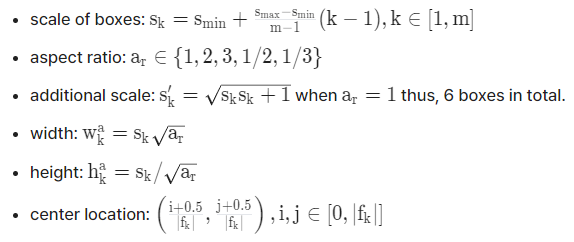
![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-09_18-12-02.max-800x600.png)


## 19-11. SSD (2) SSD의 Loss와 성능
### Matching strategy
- 학습 전에 ground truth와 default box의 IoU이 0.5이상인 것을 미리 매칭시켜 positive sample로 설정한다.
- IoU이 0.5이상인 default box를 모두 사용하면 학습 문제를 단순화시켜서 더 높은 성능을 가져올 수 있다.
---
### SSD Loss function
- SSD Loss function의 식은 아래와 같다.

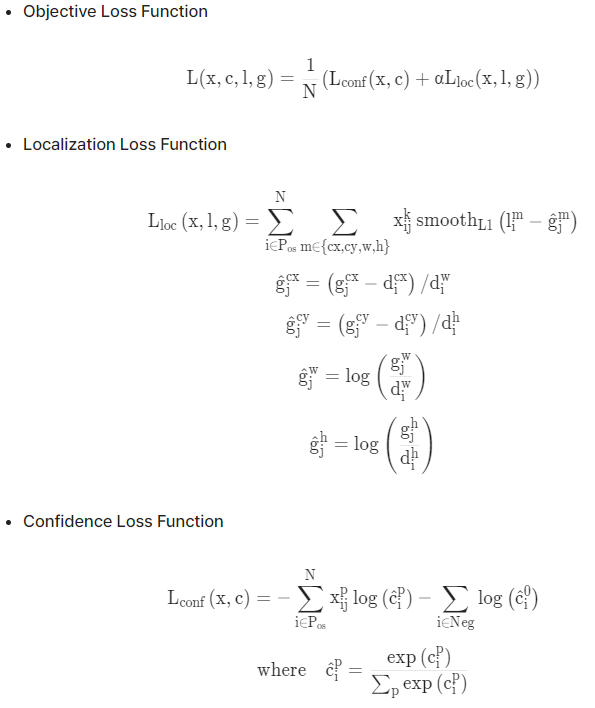
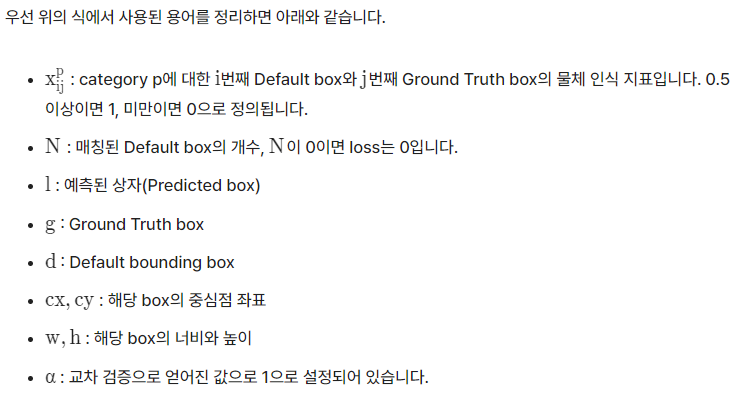
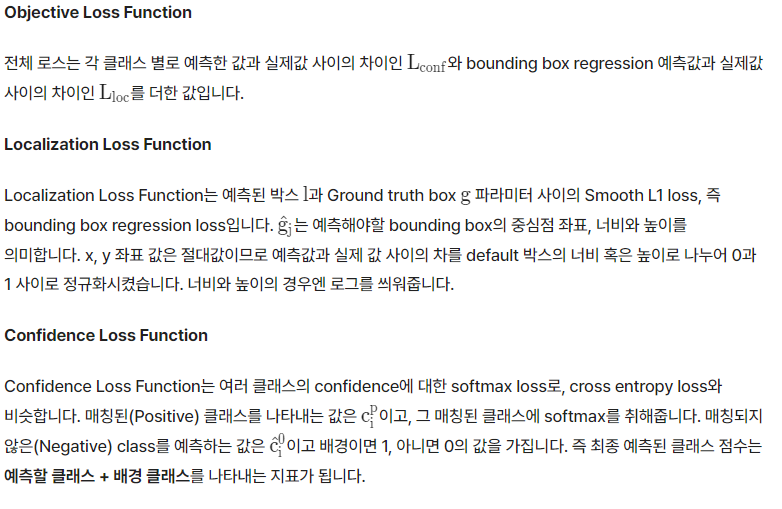

---

### Hard negative mining
- 대부분의 Default box가 배경이기 때문에 x^p_ij이 0인 경우가 많다.
- 따라서 마지막 class의 loss 부분에서는 default box를 high confidence 순으로 정렬해 상위만 가져다 써서 positive:negative 비율을 1:3으로 정해 출력한다.
- 이로써 최적화 속도가 빨라지고 안정적으로 학습된다.
---
### SSD의 성능
- Faster R-CNN보다는 성능이 조금 낮지만 속도는 빠르고,
- YOLO보다는 성능이 높고 속도는 느리다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-09_15-10-08.max-800x600.png)
![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-09_15-10-17.max-800x600.png)


## 19-12. Face Detection을 위한 모델들
### TinaFace
- Face Detection과 Object Detection이 다르지 않다는 점을 지적하면서, Object Detection에서 사용했던 기법을 사용해 단순하지만 좋은 성능을 보이는 모델
- 백본으로 ResNet50을 사용했고 기존에 존재했던 모듈(Feature Pyramid Network, Inception block, FCN 등)을 활용했다.

![image](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-11-10_12-55-35.max-800x600.png)

---
### RetinaFace
- 1-stage face detector
- 다양한 얼굴 크기에 대해 pixel-wise face localization을 수행
- 이를 위해 기존의 box classification과 regression 브랜치와 함께 extra-supervised and self-supervied multi-task learning

![image](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-10_14-25-09.png)

---
### DSFD
- DSFD는 Feature Enhance Module(FEM), Progressive Anchor Loss(PAL), Improved Anchor Matching (IAM)라는 기법을 사용해 성능을 높인 모델
- 언급한 세 기법이 two-stream으로 디자인되어 있어서 Dual Shot Face Detector라는 이름이 붙었다고 한다.
---
### S3FD
- 하나의 deep neural network를 사용해 다양한 얼굴 크기에 대해 face detection을 수행하며, 특히 작은 얼굴을 찾는 모델이다.
- 다양한 크기의 얼굴을 잘 찾기 위해 layer의 넓은 범위에 anchor를 바둑판 형식으로 배열했고,
- anchor 크기도 새롭게 디자인했다.
- 그 외에도 작은 얼굴을 잘 찾기 위해 다양한 기법을 사용했다.
---
종합퀴즈
Q. 네트워크 구조와 바운딩 박스 예측에 대해서 YOLO v1과 SSD의 차이점을 설명해보자.
```
YOLO
- 단일 신경망을 사용하여 객체 감지를 수행
- 입력 이미지를 그리드로 나눈 후, 각 그리드 셀이 담당하는 bbox와 클래스 확률을 예측

SSD
- 여러 다단계 신경망을 사용한다.
- 다양한 크기의 default boxes를 설정하고,
- 각 계층에서 다른 크기의 객체를 감지하도록 설계

YOLO v1 : 단일 컨볼루션 신경망으로 구성되어 있으며, 입력 이미지를 그리드로 나누고 각 그리드 셀마다 바운딩 박스의 좌표 (x, y, 너비, 높이)를 직접 예측합니다.

SSD : 컨볼루션 신경망으로 구성된 피라미드 형태의 서로 다른 feature map을 사용하여 여러 가지 크기의 바운딩 박스를 예측합니다.
```